## MSBA CAPSTONE - Swire Coca-cola Customer Success Prediction

### Table of Contents:
### 1. Business Problem Statement
### 2. EDA
####     2.1 Data Preparation
####     2.2 Exploratory Questions
####     2.3 Metrics 1-5
####     2.4 Overall Results
### 3. Modeling
####     3.1 Data Preparation and Feature Engineering
####     3.2 Modeling Process : Model Selection, Cross Validation, Model Tuning
####     3.2a Linear Regression Model
####     3.2b KNN Model
####     3.2c Decision Tree
####     3.3 Model Performance
### 4. Results

## 1. Business Problem Statement

#### Swire Coca-cola business is a 'B2B' driven by local businesses such as restaurants. To partner with another business, Swire needs to analyze if the partnered business can gain profits and less risk of loss. To resolve this issue, the company needs to improve its ability to predict the following metrics:
#### 1) Business popularity by checking its overall rating ( 4.0 or higher online reviews), 
#### 2) Longevity (1, 2, or 3+ years),
#### 3) 3-year volume sales.

#### The main objective is to identify the factors like Profit, Costs, Trade Channel, Beverage Type that will help Swire Coca-cola to understand the market well and the potential customers.
#### By Analyzing the metrics mentioned above, Swire Coca-cola aims to identify the prospective business customers and determine the price and funding for a business who are most likely to provide high profits and less risk.
#### The project will succeed by analyzing the customer and sales data, providing Swire Coca-cola with a list of Customers, which will help them to gain more profits. The project timeline is three months, delivered by 3 MSBA graduate students.

## 2. EDA

### Importing Libraries

In [137]:
### Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pydoc import help
from scipy.stats.stats import pearsonr
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import random
from datetime import datetime as dt


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import sklearn.metrics as sk
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score

### Importing Data

In [2]:
cus_df = pd.read_excel("/Users/msdta/Downloads/FSOP_Customer_Data_v2.0.xlsb", engine='pyxlsb')
sales_df = pd.read_excel("/Users/msdta/Downloads/FSOP_Sales_Data_v2.0.xlsb", engine='pyxlsb')

In [3]:
cus_df

,CUSTOMER_NUMBER_BLINDED,SALES_OFFICE_DESCRIPTION,DELIVERY_PLANT_DESCRIPTION,ON_BOARDING_DATE,ADDRESS_CITY,ADDRESS_ZIP_CODE,COUNTY,GEO_LONGITUDE,GEO_LATITUDE,CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION,CUSTOMER_TRADE_CHANNEL_DESCRIPTION,CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION,BUSINESS_TYPE_EXTENSION_DESCRIPTION,CUSTOMER_TRADE_CHANNEL_DESCRIPTION2,MARKET_DESCRIPTION,COLD_DRINK_CHANNEL_DESCRIPTION
0,C0895044502170683,"Tucson, AZ","Tucson, AZ",42772,TUCSON,85756-6948,PIMA,-110.928378,32.115937,Other Shopping & Ser,General Merchandiser,Other General Mercha,DSD,General Merchandiser,FSOP,RETAIL
1,C0409008701210025,"Tacoma, WA","Tacoma Sales Center, WA",39944,FORT LEWIS,98433,PIERCE,-122.587244,47.102365,Eating & Drinking,Quick Service Restau,QSR-Pizza,DSD,Quick Service Restau,FSOP,EATING/DRINKING
2,C0278065006510168,"Walla Walla, WA","Walla Walla, WA",38035,COLLEGE PLACE,99324-9730,WALLA WALLA,-118.373040,46.052920,Other Shopping & Ser,General Merchandiser,Hardware/Home-Improv,DSD,General Merchandiser,FSOP,RETAIL
3,C0559043803480412,"Prescott, AZ","Glendale, AZ",34215,PRESCOTT,86301-3313,YAVAPAI,-112.450490,34.545020,Travel/Transportatio,Lodging,Other Lodging,DSD,Lodging,FSOP,LODGING
4,C0729091103720749,"Reno, NV","Reno, NV",41990,SOUTH LAKE TAHOE,96150-7702,EL DORADO,-119.984227,38.926637,Other Shopping & Ser,Automotive Services,Other Automotive Ser,DSD,Automotive Services,FSOP,RETAIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40381,C0969054506370153,"Johnstown, CO","Johnstown, CO",43486,GREELEY,80631-9529,WELD,-104.677498,40.429684,Third Party (Non-Con,All Other,B2B CONTRACTUAL DIST,Secondary Volume,All Other,ALL OTHER,WHOLESALE
40382,C0826029007880667,"Tempe, AZ","Tempe, AZ",43353,CHANDLER,85224-2878,MARICOPA,-111.859055,33.338470,Third Party (Non-Con,All Other,B2B CONTRACTUAL DIST,Secondary Volume,All Other,ALL OTHER,WHOLESALE
40383,C0720037102950022,"Albuquerque, NM","Albuquerque, NM",42991,ALBUQUERQUE,87113-1554,BERNALILLO,-106.597680,35.184660,Entertainment/Recrea,Recreation,Other Recreation,Spcl Evnt: One Time,Recreation,FSOP,DESTINATION VENUE
40384,C0285043409270577,"Draper, UT","Draper, UT",40140,SALT LAKE CITY,84104,SALT LAKE,-111.974670,40.749605,Other Shopping & Ser,Automotive Services,Other Automotive Ser,DSD,Automotive Services,FSOP,RETAIL


In [4]:
sales_df.head()

,CUSTOMER_NUMBER_BLINDED,PRODUCT_SOLD_BLINDED,BEV_CAT_DESC,CALORIE_CAT_DESC,PACK_TYPE_DESC,PACK_SIZE_SALES_UNIT_DESCRIPTION,PHYSICAL_VOLUME,DISCOUNT,INVOICE_PRICE,DEAD_NET,GROSS_PROFIT_DEAD_NET,COGS,MIN_POSTING_DATE,MAX_POSTING_DATE,NUM_OF_TRANSACTIONS
0,C0051046109640797,M056203880974,CORE SPARKLING,REGULAR CALORIE,Plastic Bottle - Contour,20 OZ 1-Ls 24,88.0,2246.40,2505.60,1924.70,1112.73,682.41,44208,44925,157
1,C0348074302380406,M042308250090,CORE SPARKLING,LOW CALORIE,Aluminum Can - Sleek,12 OZ 4-Pk 24,58.0,1197.12,1666.92,1468.77,316.19,1185.98,44229,44925,40
2,C0277089703710223,M010605530774,TEA,LOW CALORIE,Plastic Bottle - Other,18.5 OZ 1-Ls 12,108.0,3429.00,1755.00,1499.03,403.25,1107.73,44627,44925,62
3,C0112072503650635,M050800200648,ENERGY DRINKS,REGULAR CALORIE,Aluminum Can,16 OZ 1-Ls 24,15.0,307.12,592.88,553.18,77.90,475.28,44721,44925,17
4,C0305009008200279,M009608400345,CORE SPARKLING,REGULAR CALORIE,Plastic Bottle - Dimple,2 LTR 1-Ls 8,195.0,3382.05,2077.95,1812.90,661.21,1416.99,44201,44925,166


### Merging Data

In [5]:
swire_data = sales_df.merge(cus_df, on='CUSTOMER_NUMBER_BLINDED', how='inner')
swire_data

,CUSTOMER_NUMBER_BLINDED,PRODUCT_SOLD_BLINDED,BEV_CAT_DESC,CALORIE_CAT_DESC,PACK_TYPE_DESC,PACK_SIZE_SALES_UNIT_DESCRIPTION,PHYSICAL_VOLUME,DISCOUNT,INVOICE_PRICE,DEAD_NET,...,COUNTY,GEO_LONGITUDE,GEO_LATITUDE,CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION,CUSTOMER_TRADE_CHANNEL_DESCRIPTION,CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION,BUSINESS_TYPE_EXTENSION_DESCRIPTION,CUSTOMER_TRADE_CHANNEL_DESCRIPTION2,MARKET_DESCRIPTION,COLD_DRINK_CHANNEL_DESCRIPTION
0,C0051046109640797,M056203880974,CORE SPARKLING,REGULAR CALORIE,Plastic Bottle - Contour,20 OZ 1-Ls 24,88.0,2246.40,2505.60,1924.70,...,MARICOPA,-111.895906,33.299225,Other Shopping & Ser,General Merchandiser,Other General Mercha,DSD,General Merchandiser,FSOP,RETAIL
1,C0051046109640797,M083804460042,ENHANCED WATER BEVERAGES,REGULAR CALORIE,Plastic Bottle - Other,20 OZ 1-Ls 12,49.0,1154.52,987.48,825.74,...,MARICOPA,-111.895906,33.299225,Other Shopping & Ser,General Merchandiser,Other General Mercha,DSD,General Merchandiser,FSOP,RETAIL
2,C0051046109640797,M080903130702,ENHANCED WATER BEVERAGES,LOW CALORIE,Plastic Bottle - Other,1 LTR 1-Ls 12,1.0,23.52,24.48,18.33,...,MARICOPA,-111.895906,33.299225,Other Shopping & Ser,General Merchandiser,Other General Mercha,DSD,General Merchandiser,FSOP,RETAIL
3,C0051046109640797,M009208500468,ENHANCED WATER BEVERAGES,REGULAR CALORIE,Plastic Bottle - Other,20 OZ 1-Ls 12,0.0,0.00,0.00,0.21,...,MARICOPA,-111.895906,33.299225,Other Shopping & Ser,General Merchandiser,Other General Mercha,DSD,General Merchandiser,FSOP,RETAIL
4,C0051046109640797,M029507850412,ENHANCED WATER BEVERAGES,LOW CALORIE,Plastic Bottle - Other,1 LTR 1-Ls 12,2.0,47.04,48.96,36.61,...,MARICOPA,-111.895906,33.299225,Other Shopping & Ser,General Merchandiser,Other General Mercha,DSD,General Merchandiser,FSOP,RETAIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831839,C0779075600590854,M093805490555,COFFEE,REGULAR CALORIE,Plastic Bottle - Other,13.7 OZ 1-Ls 12,0.0,0.00,0.00,0.00,...,LANE,-123.158000,44.062955,Third Party (Non-Con,All Other,B2B CONTRACTUAL DIST,Secondary Volume,All Other,ALL OTHER,WHOLESALE
831840,C0737058205910387,M093201520599,CORE SPARKLING,LOW CALORIE,Aluminum Can,12 OZ 12-Pk 24 Frid,0.0,0.00,0.00,0.00,...,MULTNOMAH,-122.679910,45.514470,Third Party (Non-Con,All Other,B2B CONTRACTUAL DIST,Secondary Volume,All Other,ALL OTHER,WHOLESALE
831841,C0733097206680354,M099404020717,CORE SPARKLING,REGULAR CALORIE,Aluminum Can,12 OZ 12-Pk 24 Frid,0.0,0.00,0.00,0.00,...,COCHISE,-109.870710,32.223515,Third Party (Non-Con,All Other,B2B CONTRACTUAL DIST,Secondary Volume,All Other,ALL OTHER,WHOLESALE
831842,C0623013105750204,M005008880997,PACKAGED WATER (PLAIN & ENRICHED),LOW CALORIE,Plastic Bottle - Other,16.9 OZ 32-Pk 32,0.0,0.00,0.00,0.00,...,WASHOE,-119.786958,39.478349,Eating & Drinking,Full Service Restaur,FSR-All Other,Equipment Only,Full Service Restaur,FSOP,EATING/DRINKING


In [6]:
swire_data.dtypes

CUSTOMER_NUMBER_BLINDED                    object
PRODUCT_SOLD_BLINDED                       object
BEV_CAT_DESC                               object
CALORIE_CAT_DESC                           object
PACK_TYPE_DESC                             object
PACK_SIZE_SALES_UNIT_DESCRIPTION           object
PHYSICAL_VOLUME                           float64
DISCOUNT                                  float64
INVOICE_PRICE                             float64
DEAD_NET                                  float64
GROSS_PROFIT_DEAD_NET                     float64
COGS                                      float64
MIN_POSTING_DATE                            int64
MAX_POSTING_DATE                            int64
NUM_OF_TRANSACTIONS                         int64
SALES_OFFICE_DESCRIPTION                   object
DELIVERY_PLANT_DESCRIPTION                 object
ON_BOARDING_DATE                            int64
ADDRESS_CITY                               object
ADDRESS_ZIP_CODE                           object


### Checking for Duplicates

In [7]:
swire_data.duplicated().sum()

0

### Summary Statistics of the data

In [8]:
swire_data.describe()

,PHYSICAL_VOLUME,DISCOUNT,INVOICE_PRICE,DEAD_NET,GROSS_PROFIT_DEAD_NET,COGS,MIN_POSTING_DATE,MAX_POSTING_DATE,NUM_OF_TRANSACTIONS,ON_BOARDING_DATE,GEO_LONGITUDE,GEO_LATITUDE
count,831844.000000,8.318440e+05,8.318440e+05,8.318440e+05,831844.000000,8.318440e+05,831844.000000,831844.000000,831844.000000,8.318440e+05,831844.000000,831844.000000
mean,36.216629,1.003791e+03,9.264490e+02,8.452765e+02,294.968306,5.802669e+02,44423.543890,44751.825311,21.227132,4.151462e+04,-114.071501,40.844303
std,564.497164,1.333821e+04,8.980693e+03,7.750886e+03,2631.942989,5.575562e+03,215.662813,215.170246,33.455899,7.099246e+03,6.239538,5.026316
min,-65832.000000,-1.390200e+04,-2.298240e+04,-3.453411e+04,-145562.380000,-7.392340e+03,44198.000000,44198.000000,1.000000,2.979900e+04,-124.590450,0.000000
25%,1.000000,1.764000e+01,3.110000e+01,2.928000e+01,8.620000,1.246000e+01,44236.000000,44617.000000,2.000000,3.995900e+04,-121.301071,37.678385
50%,5.000000,9.000000e+01,1.367900e+02,1.300000e+02,44.800000,7.270000e+01,44349.000000,44860.000000,7.000000,4.250600e+04,-112.036835,40.605505
75%,17.000000,4.134000e+02,5.234200e+02,5.000000e+02,181.940000,2.976700e+02,44593.000000,44925.000000,24.000000,4.385700e+04,-110.976735,45.514964
max,136349.000000,2.847662e+06,1.813004e+06,1.813004e+06,883618.130000,1.370468e+06,44925.000000,44926.000000,468.000000,2.958465e+06,0.000000,49.002050


### Exploratory Questions:

#### 1. If more discounts are provided to the customers, Are they capable enough of gaining more profits?
#### 2. Which customers are able to sell goods faster?
#### 3. Which beverage, calorie type has the highest market?
#### 4. Which Trade Channel is swire making most of the business?
#### 5. Which Cities has the highest number of business with Swire?

### Metric 1: Identifying the correlation between Discounts and Profits

In [9]:
avg_discount = swire_data['DISCOUNT'].mean()
avg_profit = swire_data['GROSS_PROFIT_DEAD_NET'].mean()

In [10]:
dis = swire_data.groupby('DISCOUNT').mean()

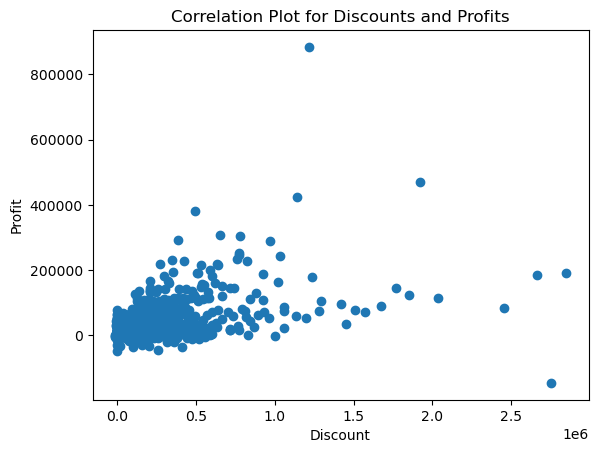

In [11]:
# Scatter plot to visualize the relationship between discounts and profits. 

plt.scatter(swire_data['DISCOUNT'], swire_data['GROSS_PROFIT_DEAD_NET'])
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.title('Correlation Plot for Discounts and Profits')
plt.show()

In [12]:
corr, _ = pearsonr(swire_data['DISCOUNT'], swire_data['GROSS_PROFIT_DEAD_NET'])
print('Correlation coefficient: %.3f' % corr)

Correlation coefficient: 0.658


### Metric 1 Result

#### The main reason to check the correlation between discounts and profits are as follows:
#### 1. If the correlation coefficient is positive it indicates that the discounts and profits are positively related. It also indicates that if discounts are high the profits are also high.

#### 2. If the correlation coefficient is negative it indicates that the discounts and profits are negatively related. It also indicates that discounts are high but profits are not high for the customer.

### Metric 2: Customers with cost of goods sold in less time.

In [13]:
# Converting the date columns to datetime objects

swire_data['MIN_POSTING_DATE'] = pd.to_datetime(swire_data['MIN_POSTING_DATE'])
swire_data['MAX_POSTING_DATE'] = pd.to_datetime(swire_data['MAX_POSTING_DATE'])

In [14]:
# Calculate the time difference for each customer

swire_data['time_difference'] = (swire_data['MAX_POSTING_DATE'] - swire_data['MIN_POSTING_DATE']).dt.days

In [15]:
# Calculate the total cost of goods sold for each customer

total_costs = swire_data.groupby('CUSTOMER_NUMBER_BLINDED')['COGS'].sum()

In [16]:
# Divide the total cost of goods sold by the time difference for each customer

costs_per_day = total_costs / swire_data.groupby('CUSTOMER_NUMBER_BLINDED')['time_difference'].max()

In [17]:
# Sort the results in descending order

costs_per_day = costs_per_day.sort_values(ascending=False)

In [18]:
# Print the top 20 customers with the highest cost of goods sold per day

print(costs_per_day.index[0:20])

Index(['C0001005009010198', 'C0670035904880526', 'C0670059902000159',
       'C0670059804470675', 'C0670059603590270', 'C0670059502540690',
       'C0670059106930479', 'C0670055500820756', 'C0670053903570761',
       'C0670049704850097', 'C0670041807560383', 'C0670041208950499',
       'C0670039404230494', 'C0670039008190169', 'C0670038204990962',
       'C0670036307150519', 'C0670034709570501', 'C0670064509250943',
       'C0670032502330081', 'C0670031305690557'],
      dtype='object', name='CUSTOMER_NUMBER_BLINDED')


### Metric 2 Result
#### The main reason to check the customers with the cost of goods sold in less time is as follows:
#### 1. To identify the customers which are able to sell goods faster in a less span of time. This metric will enable us to know and predict which business are capable enough to make more profits and sales. So that business can be done with that customer.

### Metric 3: Beverages, Calorie Type that has more market.

In [19]:
# Group the data by the beverage type and count the number of occurencies of each beverage count

bev_counts = swire_data.groupby('BEV_CAT_DESC')['BEV_CAT_DESC'].count()

In [20]:
# Sort the results in descending order

bev_counts = bev_counts.sort_values(ascending=False)

In [21]:
# Top Beverages

top_bev = bev_counts[:]

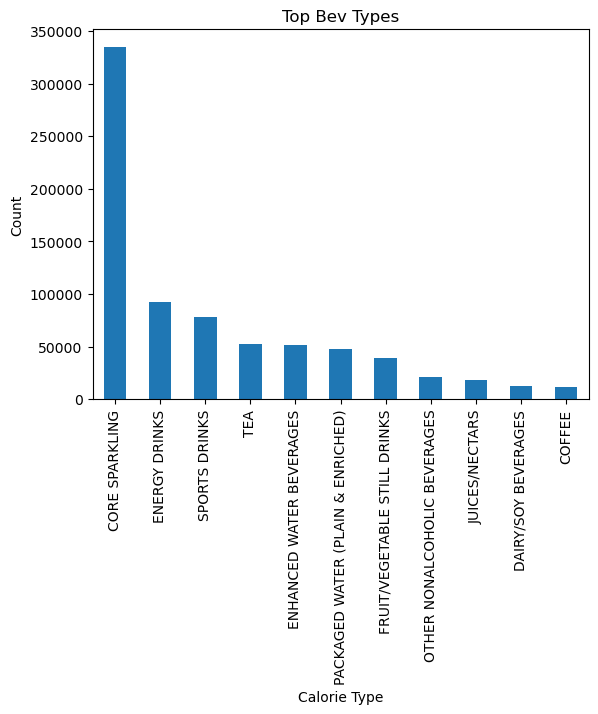

In [22]:
# Bar Plot

top_bev.plot(kind='bar')
plt.title('Top Bev Types')
plt.xlabel('Calorie Type')
plt.ylabel('Count')
plt.show()

### Calorie Type

In [23]:
# Group the data by the calorie type and count the number of occurencies of each calorie count

calorie_counts = swire_data.groupby('CALORIE_CAT_DESC')['CALORIE_CAT_DESC'].count()

# Sort the results in descending order

calorie_counts = calorie_counts.sort_values(ascending=False)

top_calorie = calorie_counts[:10]

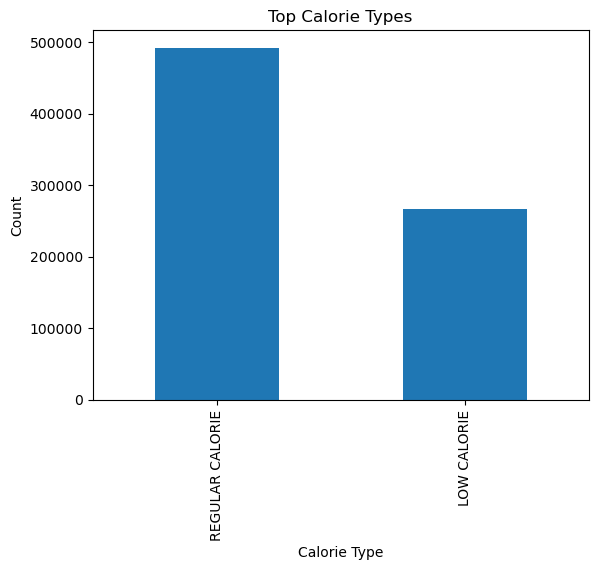

In [24]:
#Bar Plot

top_calorie.plot(kind='bar')
plt.title('Top Calorie Types')
plt.xlabel('Calorie Type')
plt.ylabel('Count')
plt.show()

### Metric 3 Result
#### The main reason to check the beverages that has more market as follows:
#### 1. This metric will help us to understand that new customers who are trying to do business for these beverages can be given priority. As these beverages already has demand in the market, so new customers also will be able to sell the beverages easily and gain good profits.

### Metric 4: Trade Channel that swire makes most of the business.

In [25]:
# Group the data by the trade channel and count the number of occurencies of each trade channel

trade_channel = swire_data.groupby('CUSTOMER_TRADE_CHANNEL_DESCRIPTION')['CUSTOMER_TRADE_CHANNEL_DESCRIPTION'].count()

In [26]:
# Sort the results in descending order

trade_counts = trade_channel.sort_values(ascending=False)

In [27]:
# Top Trade Channel

top_trade = trade_counts[:]

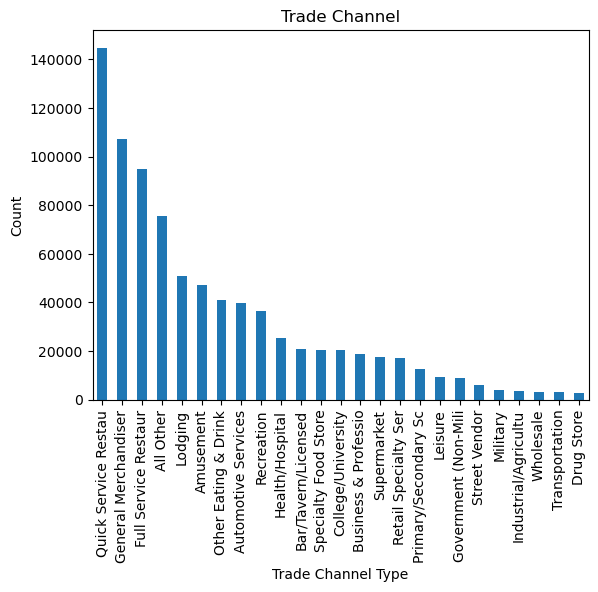

In [28]:
# Bar Plot

top_trade.plot(kind='bar')
plt.title('Trade Channel')
plt.xlabel('Trade Channel Type')
plt.ylabel('Count')
plt.show()

### Metric 5: Cities that has the highest number of business with Swire

In [29]:
# Group the data by the city and count the number of occurencies of each city

city_counts = swire_data.groupby('ADDRESS_CITY')['ADDRESS_CITY'].count()

In [30]:
# Sort the results in descending order

city_counts = city_counts.sort_values(ascending=False)

In [31]:
# Top 10 Cities

top_10_cities = city_counts[:10]

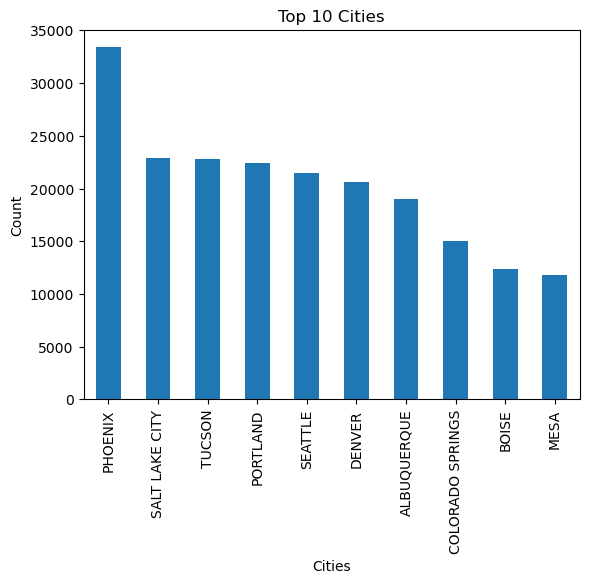

In [32]:
# Bar Plot

top_10_cities.plot(kind='bar')
plt.title('Top 10 Cities')
plt.xlabel('Cities')
plt.ylabel('Count')
plt.show()

### Metric 5 Result
#### The main reason to check the top cities that swire makes most business with are as follows:
#### 1. This metric will help us to understand which cities does Swire do the most business with. so that, they can confidently partner with new customers from that city.

## Overall Results

#### I observed that the customers who were offered with more discounts have gotten more profits. As the correlation coefficient is positive. So, customers offered with more discounts are capable of gaining profits.
#### Customers who have sold their goods in less span of time are capable of selling more than expected amount of products. 
#### Simultaneously, knowing the type of beverages, calorie type, highest trade channel, top most cities will help Swire to understand what is the market popular for and the top cities where the business is in demand.

#### The above results are my observations from the data provided.

## 3. Modeling 

### 3.1 Data Preparation and Feature Engineering

In [78]:
##Creating empty array's

reg=[]
r2_score=[]
mean_square_error=[]
root_mean_square_error=[]

#fetching and re-arranging the dataset

dataset = sales_df

X = dataset.iloc[:1000, 0:2].values
X_extra = dataset.iloc[:1000, 6:12]
y = dataset.iloc[:1000,10:11 ].values

In [140]:
#Encoding string datatypes

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()

X[:,0] = le.fit_transform(X[:,0])
X_new = pd.get_dummies(X[:,0])

In [80]:
#merging of dummies and 6-12 dolumns 

X_new1 = pd.concat([X_new, X_extra], axis="columns" )

In [146]:
#Feature scaling

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()

X1 = sc_X.fit_transform(X_new1)
y1 = sc_y.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2) 


/Users/msdta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/msdta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


### 3.2 Modeling Process

### The models I considered are as follows:
#### - Linear Regression
#### - K-nearesr neighbour
#### - Decision Trees



#### ~ Model Accuracy : The accuracy is a measure of how well the model predicted the correct labels of the test data.

#### ~ Cross Validation : Cross-validation is a technique used to estimate the performance of a machine learning model on an independent dataset, which can be helpful in assessing how well the model will generalize to new, unseen data. In the below models I've used K-fold cross validation. cross_val_score() function is used to calculate the accuracy of the model on the training data X_train and y_train using 3-fold cross-validation.

#### ~ Model Tuning : Model tuning, also known as hyperparameter tuning, refers to the process of optimizing the performance of a machine learning model by finding the best values for its hyperparameters.

#### Output Variable : GROSS_PROFIT_DEAD_NET

### 3.2a Model 1: Linear Regression (Model Fit, Model Accuracy, Cross Validation, Model Tuning)


#### Linear regression is one of the easiest and most popular Machine Learning algorithms. It is a statistical method that is used for predictive analysis which makes predictions for continuous/real or numeric variables.Linear regression algorithm shows a linear relationship between a dependent (y) and one or more independent (y) variables, hence called as linear regression

In [83]:
#Simple LR FIT

# importing module

from sklearn.linear_model import LinearRegression

LR = LinearRegression()

# fitting the training data

LR.fit(X_train,y_train)

y_pred1 =  LR.predict(X_test)
y_pred1 = sc_y.inverse_transform(y_pred1) 
y_test1=sc_y.inverse_transform(y_test)

In [122]:
# predicting the accuracy score

score=r2_score(y_test1,y_pred1)

# printing r2 score
print('r2 score is ',score)

# printing mean squared error
print('mean_sqrd_error is==',mean_squared_error(y_test1,y_pred1))

# printing root mean squared error
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test1,y_pred1)))

r2 score is  0.9752735402555742
mean_sqrd_error is== 680333.17584597
root_mean_squared error of is== 824.8231179143623


In [121]:
#cross validation
LR_accuracies = cross_val_score(estimator = LR, X = X_train, y = y_train, cv = 3)
print(LR_accuracies)

print(LR_accuracies.mean())

[0.87854734 0.99361834 0.8991914 ]
0.923785690950468


In [115]:
# defining plot graph
def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(y_test, y_pred, color='red')
    plt.plot(range(my_range), range(my_range), 'o')
    plt.title(regressorName)
    plt.show()
    return

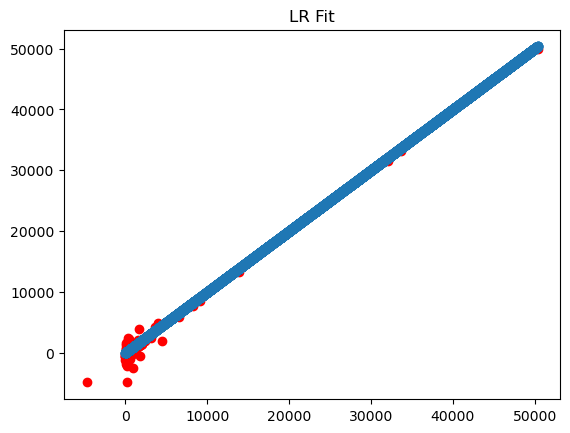

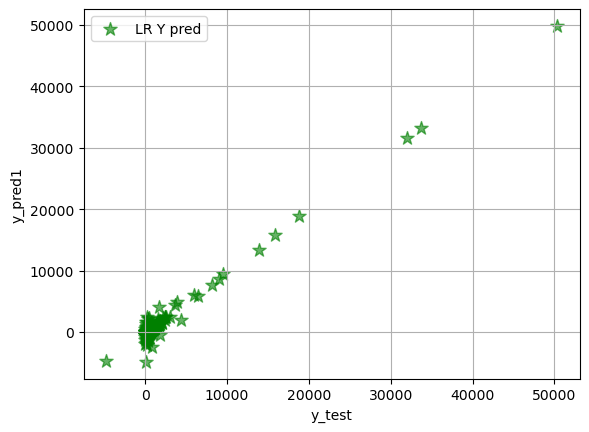

In [116]:
#Plotting model fitting

plotGraph(y_test1, y_pred1, 'LR Fit')
plt.scatter(y_test1,y_pred1,color='g',marker='*', alpha=0.6, s=100,label='LR Y pred')
plt.xlabel('y_test')
plt.ylabel('y_pred1')
plt.legend()
plt.grid()

### 3.2b Model 2: KNN - K- Nearest Neighbours (Model Fit, Model Accuracy, Cross Validation, Model Tuning)

#### K-Nearest Neighbors is one of the simplest supervised machine learning algorithms used for classification. It classifies a data point based on its neighbors’ classifications. It stores all available cases and classifies new cases based on similar features.

In [123]:
#KNN model

from sklearn import neighbors

knn= neighbors.KNeighborsRegressor(n_neighbors = 9)
knn.fit(X_train, y_train)  
y_pred= knn.predict(X_test)
y_pred2 = sc_y.inverse_transform(y_pred) 

In [124]:
# predicting the accuracy score
score=r2_score(y_test1,y_pred2)
print('r2 score is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test1,y_pred2))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test1,y_pred2)))

r2 score is  0.2625598727965843
mean_sqrd_error is== 20290206.884536203
root_mean_squared error of is== 4504.465216264435


In [126]:
#cross validation
knn_accuracies = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 3)
print(knn_accuracies)

print(knn_accuracies.mean())

[0.21443229 0.00775716 0.0553345 ]
0.09250798229239283


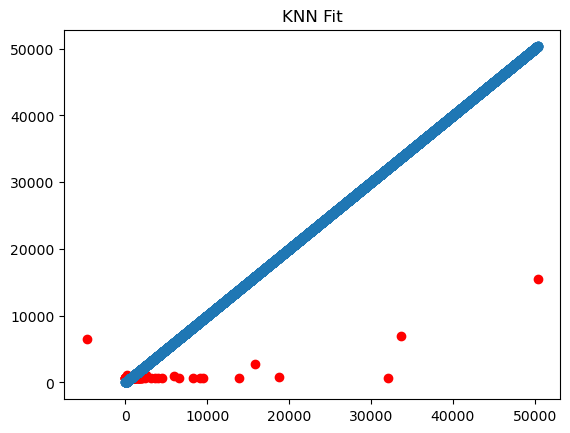

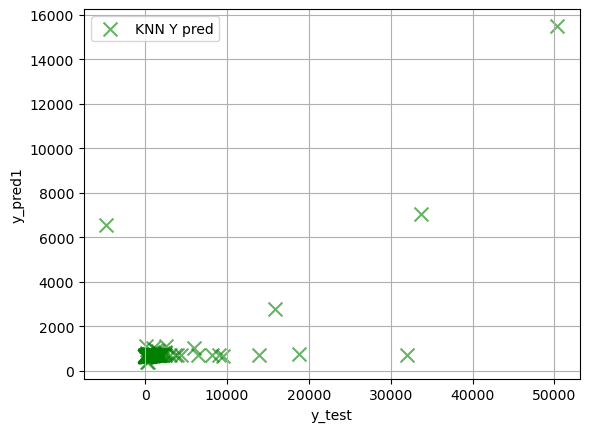

In [127]:
#plotting model fitting
plotGraph(y_test1, y_pred2, 'KNN Fit')
plt.scatter(y_test1,y_pred2,color='g',marker='x', alpha=0.6, s=100,label='KNN Y pred')
plt.xlabel('y_test')
plt.ylabel('y_pred1')
plt.legend()
plt.grid()

### 3.2c Model 3: Decision Tree (Model Fit, Model Accuracy, Cross Validation, Model Tuning)

#### A decision tree simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees. In Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.

In [97]:
#Decision tree

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)  

y_pred= regressor.predict(X_test)
y_pred=y_pred.reshape((-1,1))
y_pred3 = sc_y.inverse_transform(y_pred) 

In [98]:
# predicting the accuracy score
score=r2_score(y_test1,y_pred3)
print('r2 score is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test1,y_pred3))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test1,y_pred3)))
lr_accuracies = cross_val_score(estimator = , X = X_train, y = y_train, cv = 3)

r2 score is  0.9365866189834123
mean_sqrd_error is== 1744779.7761615007
root_mean_squared error of is== 1320.9011227800136


In [147]:
#cross validation
y_train=y_train.ravel()
DT_accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 3)
print(DT_accuracies)

print(DT_accuracies.mean())

[0.88783496 0.97110429 0.88295354]
0.9139642611977963


In [129]:
reg=[]
r2_score=[]
mean_square_error=[]
root_mean_square_error=[]

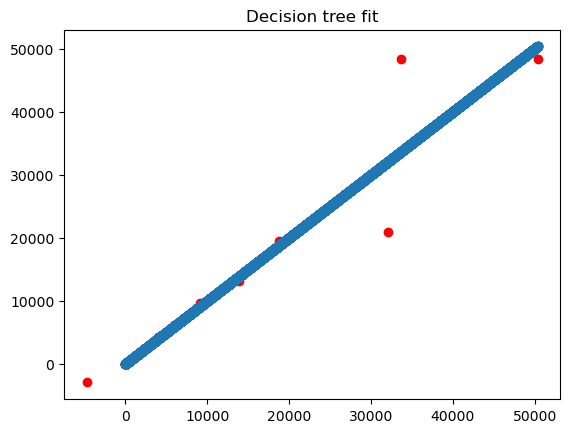

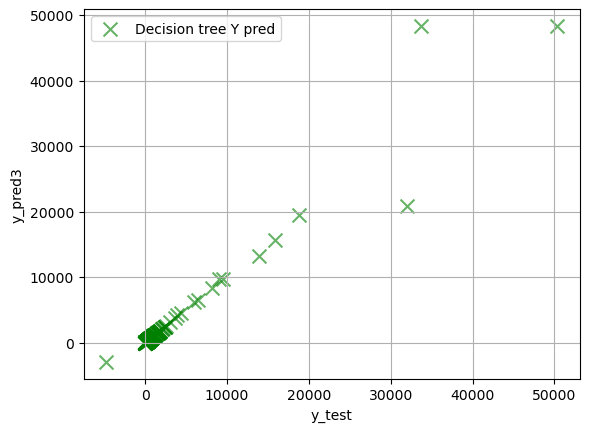

In [131]:
# plotting model fitting

plotGraph(y_test1, y_pred3, 'Decision tree fit')
plt.scatter(y_test1,y_pred3,color='g',marker='x', alpha=0.6, s=100,label='Decision tree Y pred')
plt.xlabel('y_test')
plt.ylabel('y_pred3')
plt.legend()
plt.grid()

### 3.3 Model Performance

#### 1. Linear Regression Performance:
#### -Accuracy(r2_score) : 0.9752735402555742
#### -mean_sqrd_error : 680333.17584597
#### -root_mean_squared error : 824.8231179143623
#### -cross validation : 0.923785690950468

#### 2. KNN Performance:

#### -Accuracy(r2_score) : 0.2625598727965843
#### -mean_sqrd_error : 20290206.884536203
#### -root_mean_squared error : 4504.465216264435
#### -cross validation : 0.09250798229239283

#### 3. Decision Tree Performance:

#### -Accuracy(r2_score) : 0.9365866189834123
#### -mean_sqrd_error : 1744779.7761615007
#### -root_mean_squared error :1320.9011227800136
#### -cross validation : 0.9139642611977963

### 4.Results

#### Based on the performance metrics, the linear regression model seems to be the best model for predicting profit as the output variable. It has a high accuracy (r2_score) of 0.975 and a low root_mean_squared_error of 824.82. Additionally, it has a high cross-validation score of 0.92, indicating good generalization performance.

#### In contrast, the KNN model has a low accuracy (r2_score) of 0.26 and a high root_mean_squared_error of 4504.47. The cross-validation score is also very low at 0.09, indicating poor generalization performance.

#### The decision tree model performs well, but not as well as the linear regression model, with an accuracy (r2_score) of 0.936, and a root_mean_squared_error of 1320.90. However, the decision tree model has a high cross-validation score of 0.91, indicating good generalization performance.

#### In summary, based on the provided performance metrics, the linear regression model would be the best choice for predicting customer's success considering GROSS_PROFIT_DEAD_NET as the output variable.